In [ ]:
# naver news headline crawling

In [1]:
import requests
from pandas import DataFrame
from bs4 import BeautifulSoup
import re
from datetime import datetime
import os

date = str(datetime.now())
date = date[:date.rfind(':')].replace(' ', '_')
date = date.replace(':','시') + '분'



query = input('검색 키워드를 입력하세요 : ')
news_num = int(input('총 필요한 뉴스기사 수를 입력해주세요(숫자만 입력) : '))
query = query.replace(' ', '+')


news_url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query={}'

req = requests.get(news_url.format(query))
soup = BeautifulSoup(req.text, 'html.parser')


news_dict = {}
idx = 0
cur_page = 1

print()
print('크롤링 중...')

while idx < news_num:
    
    table = soup.find('ul',{'class' : 'list_news'})
    li_list = table.find_all('li', {'id': re.compile('sp_nws.*')})
    area_list = [li.find('div', {'class' : 'news_area'}) for li in li_list]
    a_list = [area.find('a', {'class' : 'news_tit'}) for area in area_list]
    
    for n in a_list[:min(len(a_list), news_num-idx)]:
        news_dict[idx] = {'title' : n.get('title'),
                          'url' : n.get('href') }
        idx += 1

    cur_page += 1

    pages = soup.find('div', {'class' : 'sc_page_inner'})
    next_page_url = [p for p in pages.find_all('a') if p.text == str(cur_page)][0].get('href')
    
    req = requests.get('https://search.naver.com/search.naver' + next_page_url)
    soup = BeautifulSoup(req.text, 'html.parser')

print('크롤링 완료')

print('데이터프레임 변환')
news_df = DataFrame(news_dict).T

folder_path = os.getcwd()
xlsx_file_name = '네이버뉴스_{}_{}.xlsx'.format(query, date)

news_df.to_excel(xlsx_file_name)

print('엑셀 저장 완료 | 경로 : {}\\{}'.format(folder_path, xlsx_file_name))
os.startfile(folder_path)

검색 키워드를 입력하세요 : 카카오뷰
총 필요한 뉴스기사 수를 입력해주세요(숫자만 입력) : 1000

크롤링 중...
크롤링 완료
데이터프레임 변환
엑셀 저장 완료 | 경로 : C:\Users\naye6\BUSKIT\네이버뉴스_카카오뷰_2022-01-24_11시22분.xlsx


In [2]:
import re
import openpyxl
from collections import Counter

def main():
    
    input_file = "C:\\Users\\naye6\\BUSKIT\\네이버뉴스_카카오뷰_2022-01-09_20시53분.xlsx"
    output_file = "C:\\Users\\naye6\\BUSKIT\\네이버뉴스_카카오뷰.txt"
    
    wb = openpyxl.load_workbook(input_file)
    ws = wb.active
    r = ws.rows
    s = ''
    
    with open(output_file, 'a', encoding = 'utf-8')as f:    

        for i, row in enumerate(r):
            try:
                s = s+row[1].value
            except:
                print("{}번째 줄 에러".format(i))
                continue

        s = s.strip()
        s = re.sub('[-=+,#/\&?:^.@*\"※title~ㆍ↑<>!』雜★→‘|\(\)\[\]`\'…》♥\”\“\’·]',' ',s)        
        s = re.sub('[만에, 총, 나, 된, 총, 등, 는, 건]',' ',s)        
        
        s = s.split()


        word_counter = Counter()
        for elem in s:
            word_counter[elem] += 1



        for word, count in word_counter.most_common():
            if count > 10:
                f.write("{} ".format(word))
            else:
                continue
            
main()


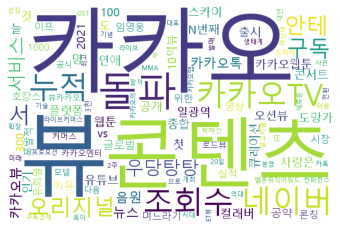

<Figure size 2160x1440 with 0 Axes>

In [4]:
from collections import Counter
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import wordcloud


def draw_wordcloud(word_counter):
    
    # 한글로 그려주기 위해 필요
    fontpath = 'C:\\Windows\\Fonts\\malgun.ttf'
    cloud_info = wordcloud.WordCloud(background_color = 'white', font_path = fontpath, width=600, height=400)
    cloud = cloud_info.generate_from_frequencies(word_counter)  #단어 빈도 dictionary로 워드클라우드 그리기
    
    # 워드클라우드 이미지 출력
    plt.imshow(cloud)
    plt.axis('off')
    plt.figure(figsize=(30, 20)) #그림 size
    plt.show()



def main():
    
    input_file_name = 'C:\\Users\\naye6\\BUSKIT\\네이버뉴스_카카오뷰.txt'
    
    word_counter = Counter()
    
    with open(input_file_name, 'r', encoding = 'utf-8-sig')as file:
        news = file.readline().split()
    
        for word in news:
            word_counter[word] += 1
    
    # 워드클라우드 그리기
    draw_wordcloud(word_counter)
    
    
main()


